In [44]:
import requests
import numpy as np
import pandas as pd
import pymc3 as pm
import theano as th
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster, covariance, manifold
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')

In [45]:
Cluster_3=[ 'NESTLEIND', 'HINDUNILVR']
Cluster_4= ['RELIANCE', 'SHREECEM', 'M&M', 'MARUTI', 'INDUSBANK', 'HEROMOTOCO', 'HDFC', 'BPCL', 'BRITANNIA', 
              'BAJAJFINSERV', 'BHARTIARTL', 'BAJAJ-AUTO']
Cluster_5= ['TATASTEEL', 'ONGC', 'JSWSTEEL', 'KOTAKBANK', 'HINDALCO']
Cluster_6= ['WIPRO', 'TECHM', 'TCS', 'INFY', 'HCLTECH']
Cluster_7= ['TITAN', 'TATAMOTORS', 'HDFCBANK']
Cluster_8= ['DRREDDYS', 'CIPLA']
Cluster_9= ['ITC', 'GRASIM', 'BAJAJFINANCE']
Cluster_10= ['NTPC', 'LT', 'IOC', 'EICHERMOTOR', 'COALINDIA', 'ASIANPAINT']

<h1> Cluster 1 </h1>

In [46]:
cluster_1= ['DATE','ULTRACEMO', 'POWERGRID']

data = pd.read_csv("../data/fifty_stocks.csv")
symbol_one = 'ULTRACEMO'
symbol_two = 'POWERGRID'
stock_data = data[cluster_1]
stock_data = stock_data.set_index('DATE')
stock_data

,ULTRACEMO,POWERGRID
DATE,,
2010-01-11,6737.95,215.65
2010-01-12,5443.70,187.30
2010-02-11,6735.25,214.60
2010-02-12,5368.40,190.20
2010-03-11,6858.65,221.05
...,...,...
2021-10-05,6403.10,219.85
2021-10-06,6709.65,241.65
2021-10-08,7474.15,172.60


In [47]:
stock1_name, stock2_name = symbol_one,symbol_two
orig_data = stock_data.loc['2020-01-01':,]
data = orig_data.diff().cumsum()
data1 = data[stock1_name].ffill().fillna(0).values
data2 = data[stock2_name].ffill().fillna(0).values

<IPython.core.display.Javascript object>


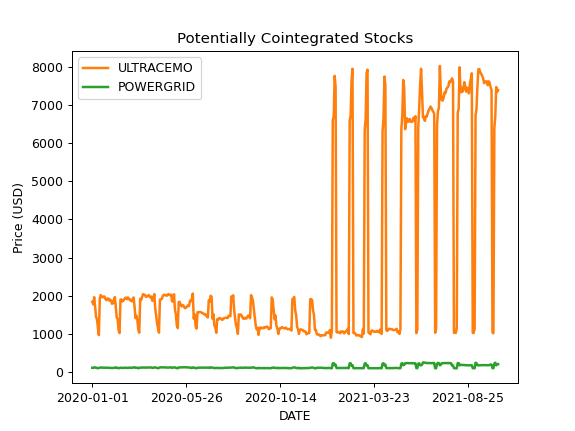

In [48]:
# plt.figure(figsize = (18,8))
ax = plt.gca()
plt.title("Potentially Cointegrated Stocks")
orig_data[stock1_name].plot(ax=ax,color=sns.color_palette()[1],linewidth=2)
orig_data[stock2_name].plot(ax=ax,color=sns.color_palette()[2],linewidth=2)
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [49]:
with pm.Model() as model:
    
    # inject external stock data
    stock1 = th.shared(data1)
    stock2 = th.shared(data2)
    
    # define our cointegration variables
    beta_sigma = pm.Exponential('beta_sigma', 150.)
    beta = pm.GaussianRandomWalk('beta', sd=beta_sigma,
                                 shape=data1.shape[0])
    
    # with our assumptions, cointegration can be reframed as a regression problem
    stock2_regression = beta * stock1
# Assume prices are Normally distributed, the mean comes from the regression.
    sd = pm.HalfNormal('sd', sd=.5)
    likelihood = pm.Normal('y',
                           mu=stock2_regression,
                           sd=sd,
                           observed=stock2)
with model:
    stock1.set_value(data1)
    stock2.set_value(data2)
    trace = pm.sample(2000,tune=315,cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, beta, beta_sigma]


Sampling 2 chains for 315 tune and 2_000 draw iterations (630 + 4_000 draws total) took 224 seconds.
There were 26 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9999997431445752, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 29 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.999999996740366, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


<IPython.core.display.Javascript object>


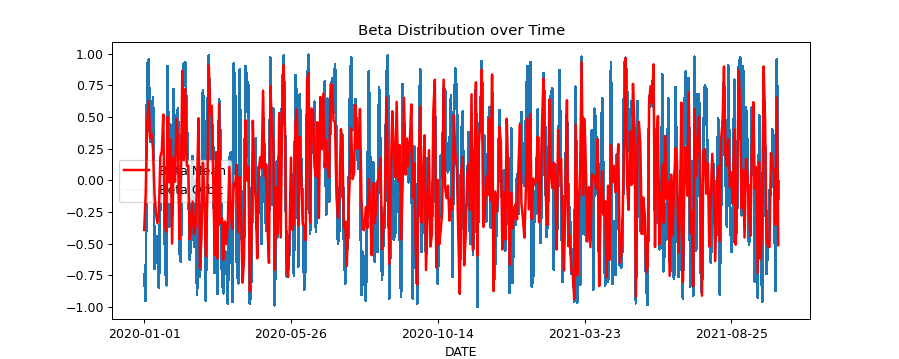

In [50]:
rolling_beta = trace[beta].T.mean(axis=1)
plt.figure(figsize = (10,4))
ax = plt.gca()
plt.title("Beta Distribution over Time")
pd.Series(rolling_beta,index=orig_data.index).plot(ax=ax,color='r',zorder=1e6,linewidth=2)
for orbit in trace[beta][:500]:
    pd.Series(orbit,index=orig_data.index).plot(ax=ax,color=sns.color_palette()[0],alpha=0.05)
plt.legend(['Beta Mean','Beta Orbit'])
#plt.savefig("beta distrib.png")
plt.show()

<h1> Cluster 2 </h1>

In [51]:
cluster_2= ['DATE','SBIN', 'ICICIBANK', 'AXISBANK']


data = pd.read_csv("../data/fifty_stocks.csv")
symbol_one = 'SBIN'
symbol_two = 'ICICIBANK'
symbol_three = 'AXISBANK'
stock_data = data[cluster_1]
stock_data = stock_data.set_index('DATE')
stock_data

,ULTRACEMO,POWERGRID
DATE,,
2010-01-11,6737.95,215.65
2010-01-12,5443.70,187.30
2010-02-11,6735.25,214.60
2010-02-12,5368.40,190.20
2010-03-11,6858.65,221.05
...,...,...
2021-10-05,6403.10,219.85
2021-10-06,6709.65,241.65
2021-10-08,7474.15,172.60
